In [1]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from PIL import ImageDraw
from pytesseract import Output

# for configuration

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

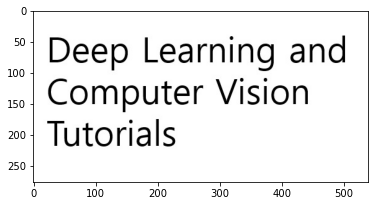

In [7]:
img = cv2.imread('./Demo.jpg')
plt.imshow(img)

In [8]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [9]:
img2char = pytesseract.image_to_string(img)

In [10]:
print(img2char)

Deep Learning and
Computer Vision
Tutorials



In [11]:
imgbox = pytesseract.image_to_boxes(img)

In [12]:
print(imgbox)

D 27 192 59 232 0
e 65 191 90 222 0
e 95 191 120 222 0
p 127 179 153 222 0
L 181 192 201 232 0
e 205 191 230 222 0
a 235 191 257 222 0
r 266 192 280 222 0
n 286 192 309 222 0
i 317 192 323 234 0
n 332 192 355 222 0
g 362 178 388 222 0
a 415 191 438 222 0
n 446 192 470 222 0
d 477 191 503 235 0
C 24 124 55 166 0
o 60 124 88 155 0
m 95 125 136 155 0
p 125 112 157 166 0
u 145 112 171 155 0
t 177 124 201 154 0
e 207 124 224 162 0
r 227 124 274 155 0
V 295 125 329 165 0
i 334 125 339 167 0
s 346 124 365 155 0
i 372 125 377 167 0
o 384 124 412 155 0
n 420 125 443 155 0
T 23 58 50 98 0
u 50 57 74 87 0
t 80 57 96 95 0
o 100 57 128 88 0
r 116 57 139 101 0
i 136 58 160 100 0
a 167 57 190 88 0
l 199 58 203 101 0
s 210 57 229 88 0



In [13]:
imgH, imgW,_ = img.shape

In [14]:
for idx, boxes in enumerate(imgbox.splitlines()):
    boxes = boxes.split(' ')
    x, y, w, h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4]) # x, y coordination, w: width, h: height
    cv2.rectangle(img, (x, imgH-y), (w, imgH-h), (0,0,255), 3)

In [17]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

cap = cv2.VideoCapture(0)

# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

cntr = 0
while True:
    ret, frame = cap.read()
    cntr += 1

    if((cntr % 1) == 0):
        imgH, imgW, _ = frame.shape

        x1, y1, w1, h1 = 0, 0, imgH, imgW

        imgchar = pytesseract.image_to_string(frame)

        imgboxes = pytesseract.image_to_boxes(frame)
        for boxes in imgboxes.splitlines():
            boxes = boxes.split(' ')
            x, y, w, h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
            cv2.rectangle(frame, (x, imgH-y), (w, imgH-h), (0, 0, 255), 3)

        cv2.putText(frame, imgchar, (x1 + int(w1/50), y1 + int(h1/50)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)

        font = cv2.FONT_HERSHEY_SIMPLEX

        cv2.imshow('Text Detection', frame)

        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()